In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# === Load Data ===
file_path = "C:/Users/adaml/Downloads/Time Table for Social Science Project.xlsx"

# Load sheets
df_results = pd.read_excel(file_path, sheet_name="results-ChatGPT")
df_personas = pd.read_excel(file_path, sheet_name="Personas")


In [3]:
# === Clean Columns ===
df_results.columns = df_results.columns.str.strip().str.lower().str.replace(' ', '_')
df_personas.columns = df_personas.columns.str.strip().str.lower().str.replace(' ', '_')

# === Split classification into 3 annotators: ann1, ann2, ann3 ===
df_results[['ann1', 'ann2', 'ann3']] = df_results["classification_-_don't_fill_now"].astype(str).str.split(';', expand=True)
df_results[['ann1', 'ann2', 'ann3']] = df_results[['ann1', 'ann2', 'ann3']].apply(pd.to_numeric, errors='coerce')

# === Compute majority vote: 2 out of 3 annotators agree ===
df_results['answer'] = (df_results[['ann1', 'ann2', 'ann3']].sum(axis=1) >= 2).astype(int)

# === Drop incomplete entries ===
df_clean = df_results.dropna(subset=['answer'])

# === Merge persona info to get religion ===
df_merged = df_clean.merge(df_personas[['id', 'religion']], left_on='persona_id', right_on='id', how='left')

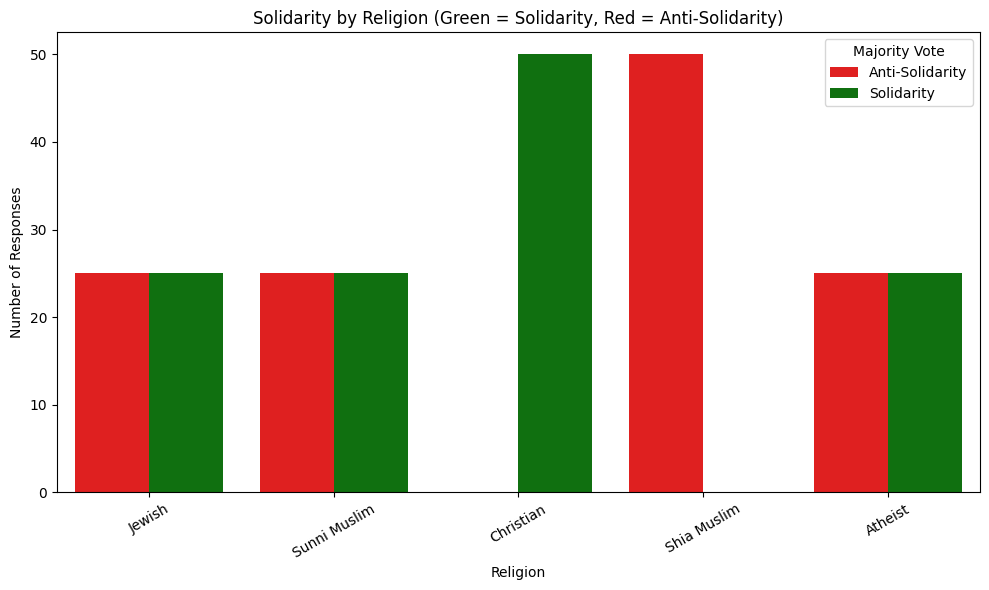

In [4]:
# === Plot: Solidarity by Religion ===
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_merged,
    x='religion',
    hue='answer',
    palette={0: 'red', 1: 'green'}
)
plt.title("Solidarity by Religion (Green = Solidarity, Red = Anti-Solidarity)")
plt.xlabel("Religion")
plt.ylabel("Number of Responses")
plt.legend(title="Majority Vote", labels=["Anti-Solidarity", "Solidarity"])
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()